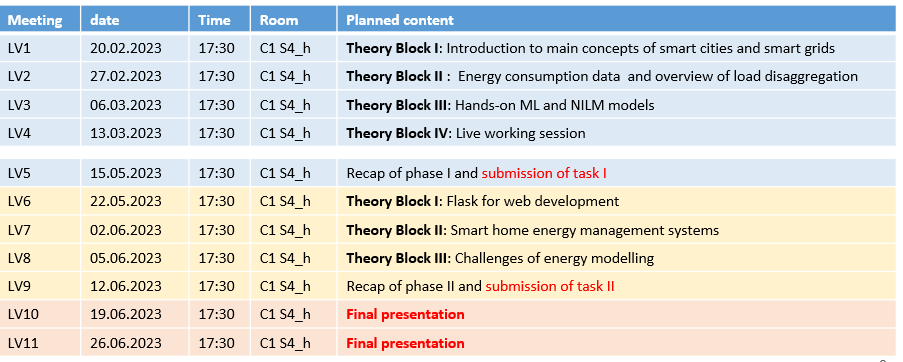

In [2]:
from IPython.display import Image
Image(filename='embedded_images/deadlines.png')

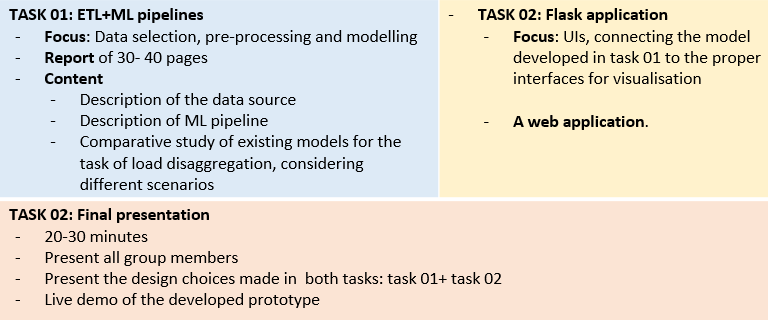

In [3]:
Image(filename='embedded_images/task_overview.png')

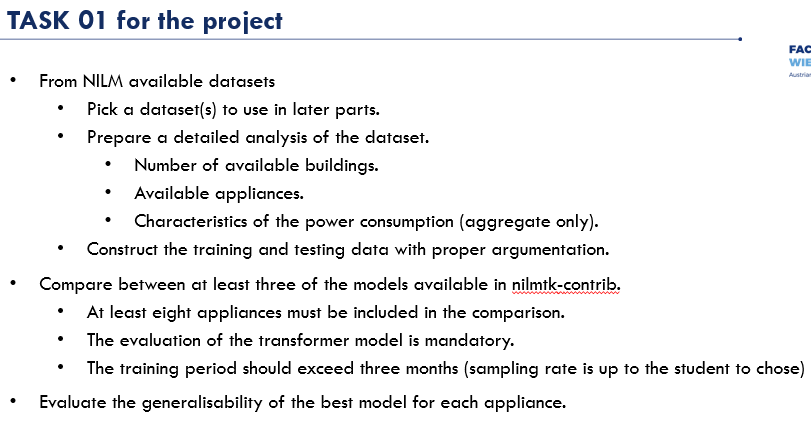

In [4]:
Image(filename='embedded_images/task_01.png')

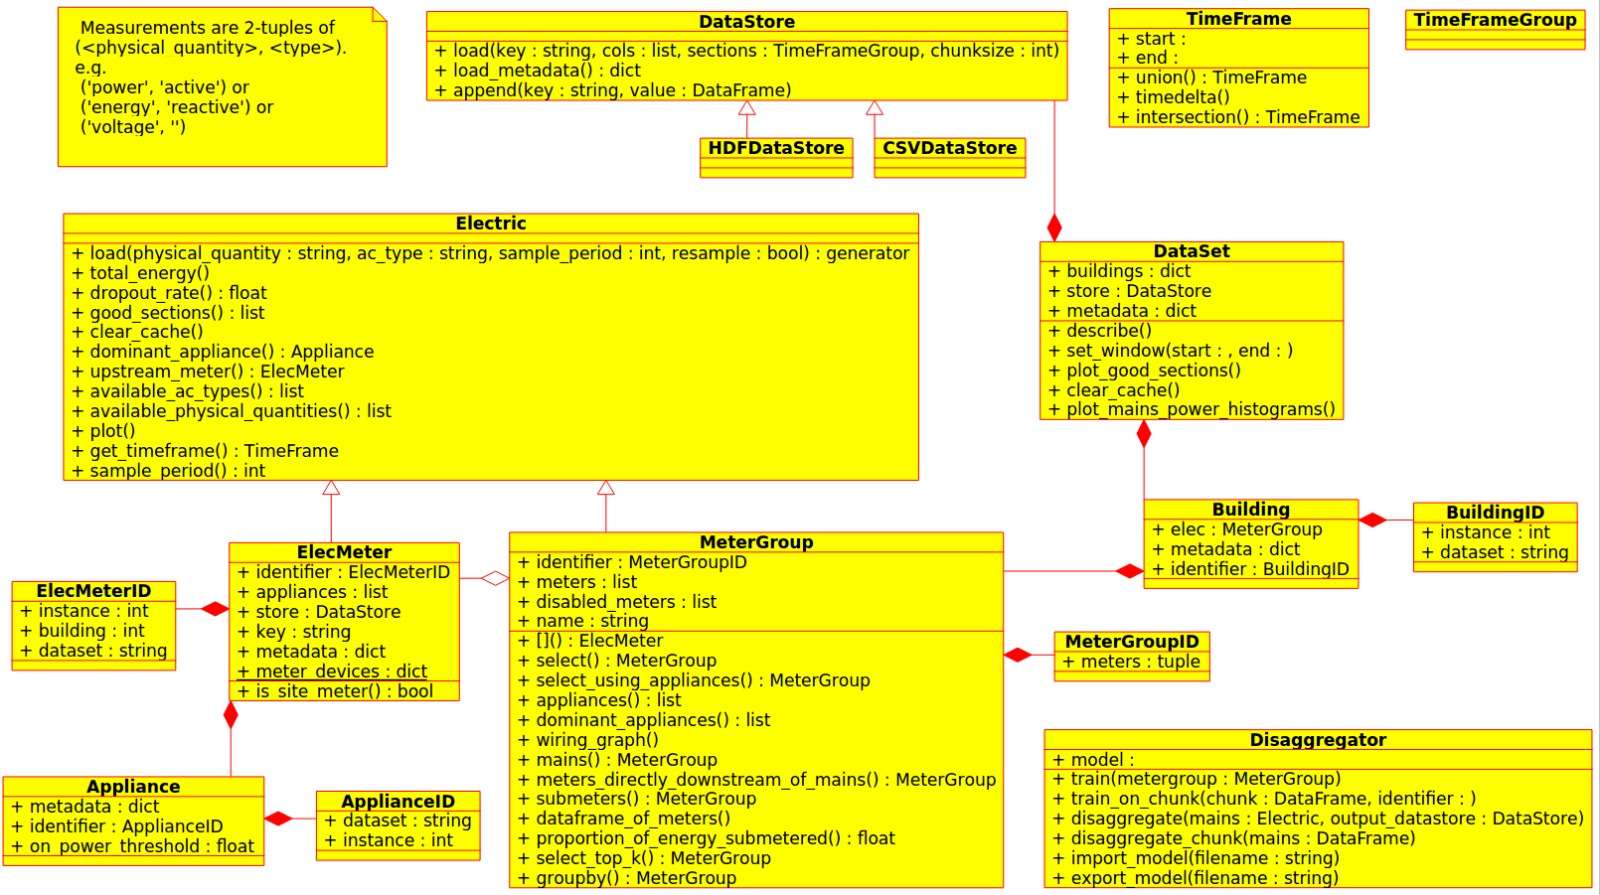

In [5]:
Image(filename='embedded_images/dataset_structure.jpeg')

In [6]:
# IDEAS
# check other datasets than ukdale for common appliances
# process data in year to year bases -> otherwise pc RIP, not enough RAM

# QEUSTIONS
# why some elecMeters multiple appliances? ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
# multiple instances of appliances

In [1]:
# Load Dataset
from nilmtk import DataSet

ukdale = DataSet("ukdale2.h5")
#{'start': '2012-11-09T22:28:15+00:00', 'end': '2017-04-26T18:35:53+01:00'}
ukdale.set_window(start='2015-01-01', end='2015-02-01')

In [2]:
# Get all appliances out of all buildings
arr = []

for j in range(len(ukdale.buildings)):
    arr2 = []
    for i in range(len(ukdale.buildings[j+1].elec.appliances)):
        arr2.append(ukdale.buildings[1].elec.appliances[i].type["type"])
    arr.append(arr2)
print(arr)

[['laptop computer', 'kettle', 'USB hub', 'active subwoofer', 'radio', 'fan', 'light', 'light', 'charger', 'light', 'light', 'bouncy castle pump', 'washer dryer', 'dish washer', 'food processor', 'ethernet switch', 'vacuum cleaner', 'tablet computer charger', 'light', 'coffee maker', 'light', 'immersion heater', 'computer monitor', 'soldering iron', 'wireless phone charger', 'computer', 'hair dryer', 'HTPC', 'laptop computer', 'clothes iron', 'broadband router', 'radio', 'audio system', 'fan', 'solar thermal pumping station', 'light', 'light', 'food processor', 'light', 'light', 'light', 'oven', 'mobile phone charger', 'water pump', 'baby monitor', 'kitchen aid', 'laptop computer', 'fridge freezer', 'audio system', 'radio', 'toasted sandwich maker', 'drill', 'boiler', 'light', 'desktop computer', 'light', 'light', 'external hard disk', 'printer', 'light', 'washer dryer', 'light', 'microwave', 'hair straighteners', 'security alarm', 'toaster', 'breadmaker', 'baby monitor', 'mobile phone

In [3]:
# buildings: 1, 2, 5 with common appliances -> 3, 4 not enough appliances
common_apps = set(arr[0]).intersection(arr[1], arr[4])
print(common_apps)

{'USB hub', 'laptop computer', 'dish washer', 'food processor', 'ethernet switch', 'vacuum cleaner', 'radio', 'charger', 'tablet computer charger', 'active subwoofer', 'light', 'kettle', 'washer dryer', 'fan', 'bouncy castle pump'}


In [4]:
# Get all ElectricMeters
ukdale.buildings[1].elec

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances

In [33]:
ukdale.buildings[1].elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


C:\Users\david\.conda\envs\case-study\lib\site-packages\nilmtk\preprocessing\clip.py:49: RuntimeWarning: No measurement limits for ('voltage', '').
  warn('No measurement limits for {}.'.format(measurement), RuntimeWarning)


0.8097479906840256

In [34]:
ukdale.buildings[1].elec.submeters().energy_per_meter()

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

,"(2, 1, UK-DALE)","(3, 1, UK-DALE)","(4, 1, UK-DALE)","(5, 1, UK-DALE)","(6, 1, UK-DALE)","(7, 1, UK-DALE)","(8, 1, UK-DALE)","(9, 1, UK-DALE)","(10, 1, UK-DALE)","(11, 1, UK-DALE)",...,"(44, 1, UK-DALE)","(45, 1, UK-DALE)","(46, 1, UK-DALE)","(47, 1, UK-DALE)","(48, 1, UK-DALE)","(49, 1, UK-DALE)","(50, 1, UK-DALE)","(51, 1, UK-DALE)","(52, 1, UK-DALE)","(53, 1, UK-DALE)"
active,NaN,NaN,1.344674,27.697803,13.017421,9.427919,NaN,11.436911,14.053327,4.751832,...,0.019955,0.340266,0.006317,0.39377,0.563701,1.160096,0.432691,5.374835,NaN,0.163314
apparent,23.004101,2.727605,NaN,NaN,NaN,NaN,19.195523,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

C:\Users\david\.conda\envs\case-study\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


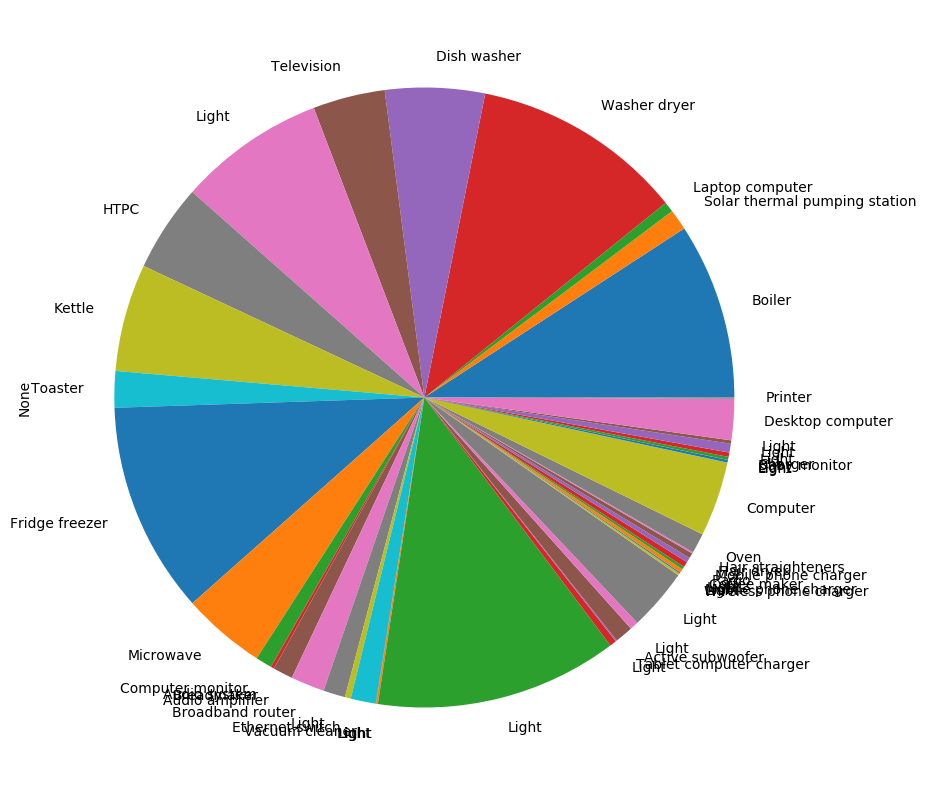

In [35]:
fraction = ukdale.buildings[1].elec.submeters().fraction_per_meter().dropna()
# Create convenient labels
labels = ukdale.buildings[1].elec.get_labels(fraction.index)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels)

In [55]:
#Get microwave data -> target time series
df_microwave =next(ukdale.buildings[1].elec["microwave"].load(sample_period=10))
microwave_df = df_microwave.unstack()["power"]["active"]
microwave_df

2015-01-01 00:00:00+00:00    1.0
2015-01-01 00:00:10+00:00    1.0
2015-01-01 00:00:20+00:00    1.0
2015-01-01 00:00:30+00:00    1.0
2015-01-01 00:00:40+00:00    1.0
                            ... 
2015-01-31 23:59:10+00:00    1.0
2015-01-31 23:59:20+00:00    1.0
2015-01-31 23:59:30+00:00    1.0
2015-01-31 23:59:40+00:00    1.0
2015-01-31 23:59:50+00:00    1.0
Freq: 10S, Length: 267840, dtype: float32

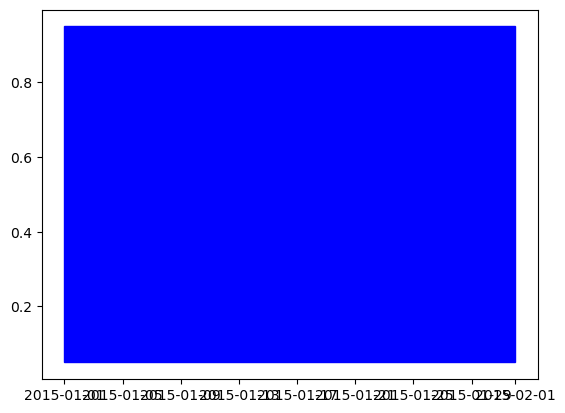

In [39]:
ukdale.buildings[1].elec["microwave"].good_sections(full_results=True).plot()

In [56]:
# Get aggregate of building -> feature time series
df_aggregate =next(ukdale.buildings[1].elec.mains().load(sample_period=10))

C:\Users\david\.conda\envs\case-study\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")


In [57]:
apparent_power_df = df_aggregate.unstack()["power"]["apparent"]
active_power_df = df_aggregate.unstack()["power"]["active"]
active_power_df

2015-01-01 00:00:00+00:00    139.268997
2015-01-01 00:00:10+00:00    139.268005
2015-01-01 00:00:20+00:00    139.240997
2015-01-01 00:00:30+00:00    139.207993
2015-01-01 00:00:40+00:00    139.272995
                                ...    
2015-01-31 23:59:10+00:00    381.015991
2015-01-31 23:59:20+00:00    380.402008
2015-01-31 23:59:30+00:00    379.971008
2015-01-31 23:59:40+00:00    380.404999
2015-01-31 23:59:50+00:00    380.345001
Freq: 10S, Length: 267840, dtype: float32

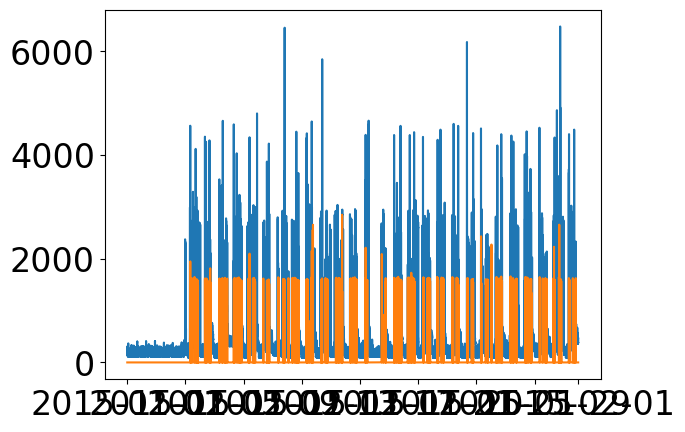

<Figure size 2000x600 with 0 Axes>

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(active_power_df)
#sns.lineplot(apparent_power_df)
sns.lineplot(microwave_df)
plt.figure(figsize=(20, 6))
plt.show()

In [58]:
# Normalize values
def normalise(df):
    mean = df.fillna(method='ffill').values.mean()
    std = df.fillna(method = 'ffill').values.std()
    return mean, std, (df.fillna(method='ffill').values-mean)/std

mean_agg, std_agg, aggregate = normalise(active_power_df)
mean_mcw, std_mcw, microwave = normalise(microwave_df)

microwave.shape, aggregate.shape

((267840,), (267840,))

In [59]:
# Sliding window (sequence to sequence)
# Padding is done here, note other approaches for the padding can be used
import numpy as np
WINDOW_SIZE = 99
aggregate = np.pad(aggregate, (WINDOW_SIZE//2, WINDOW_SIZE//2 +1))
microwave = np.pad(microwave.reshape(-1), (WINDOW_SIZE//2, WINDOW_SIZE//2 +1))

In [60]:
aggregate = np.array([
    aggregate[i:i+WINDOW_SIZE] for i in range(len(aggregate)-WINDOW_SIZE)
])
aggregate.shape

(267840, 99)

In [61]:
microwave = np.array([
    microwave[i:i+WINDOW_SIZE] for i in range(len(microwave)-WINDOW_SIZE)
])
microwave.shape

(267840, 99)

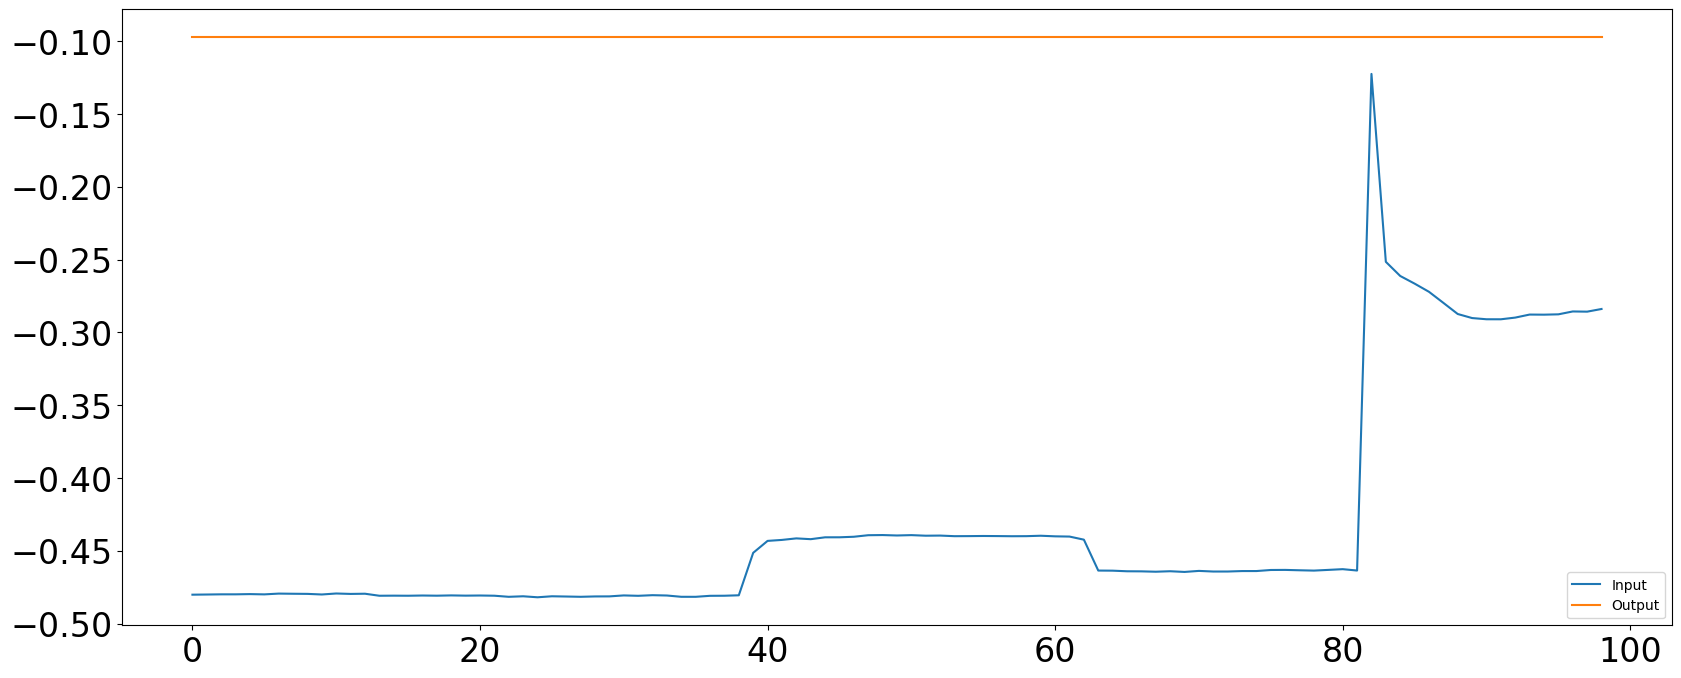

In [62]:
# Print some random sequences to test
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.font_manager
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)

index = 70
input_seq = aggregate[index]
output_seq = microwave[index]
figure(figsize=(20,8))
plt.plot(input_seq, label='Input')
plt.plot(output_seq, label='Output')
plt.legend()
plt.show()

In [63]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense
def return_seq2seq(sequence_length):
    model = Sequential()
    # 1D Conv
    model.add(Conv1D(30,10,activation="relu",input_shape=(sequence_length,1),strides=2))
    model.add(Conv1D(30, 8, activation='relu', strides=2))
    model.add(Conv1D(40, 6, activation='relu', strides=1))
    model.add(Conv1D(50, 5, activation='relu', strides=1))
    model.add(Dropout(.2))
    model.add(Conv1D(50, 5, activation='relu', strides=1))
    model.add(Dropout(.2))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(sequence_length))
    optim = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='mse', optimizer=optim)
    return model

microwave_model = return_seq2seq(WINDOW_SIZE)

In [64]:
microwave_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 45, 30)            330       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 19, 30)            7230      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 14, 40)            7240      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 10, 50)            10050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 50)             12550     
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 50)            

In [65]:
aggregate = np.expand_dims(aggregate, axis=-1)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(aggregate, microwave, test_size=.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((214272, 99, 1), (53568, 99, 1), (214272, 99), (53568, 99))

In [67]:
X_train.shape, y_train.shape

((214272, 99, 1), (214272, 99))

In [68]:
np.isnan(X_train).sum(), np.isnan(y_train).sum()

(0, 0)

In [83]:
history = microwave_model.fit(X_train, y_train, validation_split=.15, batch_size=64, epochs=10, shuffle=True)

Epoch 1/10
2846/2846 [==============================] - 18s 6ms/step - loss: 0.5428 - val_loss: 0.7563
Epoch 2/10
2846/2846 [==============================] - 17s 6ms/step - loss: 0.4865 - val_loss: 0.6879
Epoch 3/10
2846/2846 [==============================] - 17s 6ms/step - loss: 0.4421 - val_loss: 0.6860
Epoch 4/10
2846/2846 [==============================] - 18s 6ms/step - loss: 0.4041 - val_loss: 0.6214
Epoch 5/10
2846/2846 [==============================] - 17s 6ms/step - loss: 0.3712 - val_loss: 0.6149
Epoch 6/10
2846/2846 [==============================] - 17s 6ms/step - loss: 0.3437 - val_loss: 0.5982
Epoch 7/10
2846/2846 [==============================] - 17s 6ms/step - loss: 0.3248 - val_loss: 0.5529
Epoch 8/10
2846/2846 [==============================] - 18s 6ms/step - loss: 0.3070 - val_loss: 0.5424
Epoch 9/10
2846/2846 [==============================] - 17s 6ms/step - loss: 0.2932 - val_loss: 0.5601
Epoch 10/10
2846/2846 [==============================] - 17s 6ms/step - l

[]

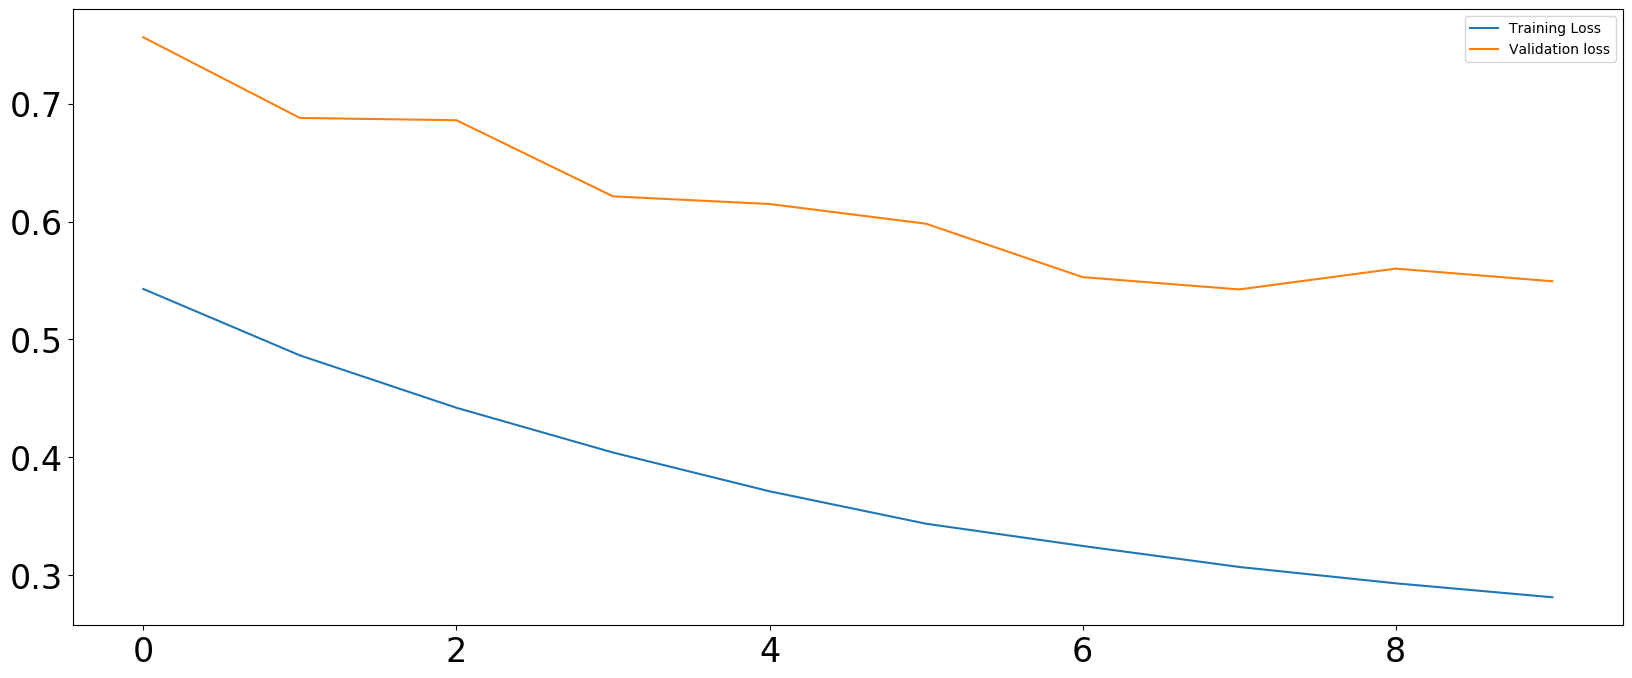

In [84]:
#tf.config.list_physical_devices('GPU') -> https://stackoverflow.com/questions/58956619/tensorflow-2-0-list-physical-devices-doesnt-detect-my-gpu
figure(figsize=(20,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.plot()

In [85]:
y_predict = microwave_model.predict(X_test)

In [86]:
y_predict.shape

(53568, 99)

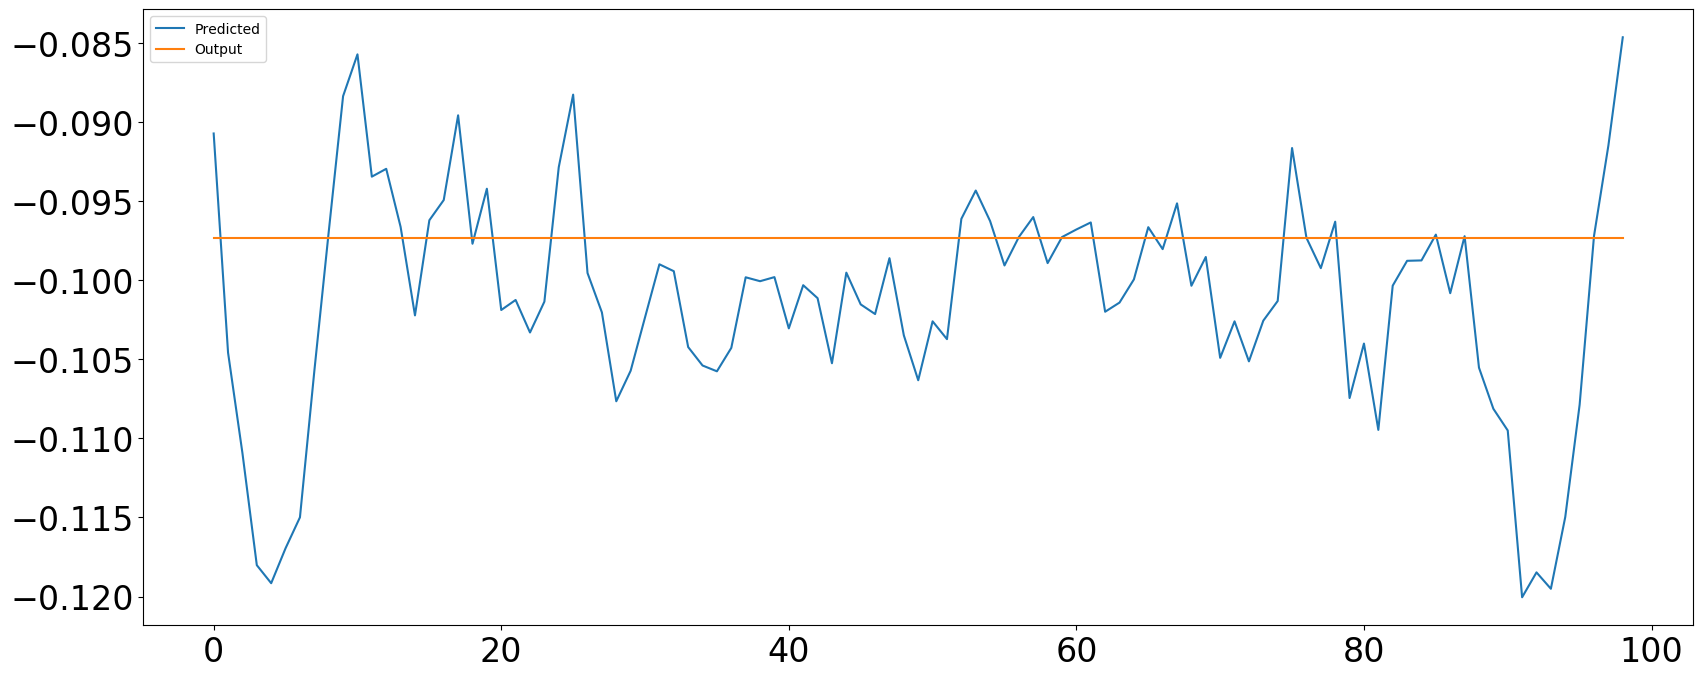

In [87]:
index = 150
predicted_seq = y_predict[index]
real_seq = y_test[index]
figure(figsize=(20,8))
plt.plot(predicted_seq, label='Predicted')
plt.plot(real_seq, label='Output')
plt.legend()
plt.show()

In [88]:
def denormlise(array, mean, std):
    return array*std+mean

def aggregate_sequences(prediction):
    l = WINDOW_SIZE
    n = len(prediction) + l - 1
    sum_arr = np.zeros((n))
    counts_arr = np.zeros((n))
    o = len(sum_arr)
    for i in range(len(prediction)):
        sum_arr[i:i + l] += prediction[i].flatten()
    counts_arr[i:i + l] += 1
    for i in range(len(sum_arr)):
        sum_arr[i] = sum_arr[i] / counts_arr[i]
    return denormlise(sum_arr, mean_mcw, std_mcw)
y_predict = aggregate_sequences(y_predict)
y_real = aggregate_sequences(y_test)

C:\Users\david\AppData\Local\Temp\ipykernel_16500\1619913380.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  sum_arr[i] = sum_arr[i] / counts_arr[i]


[]

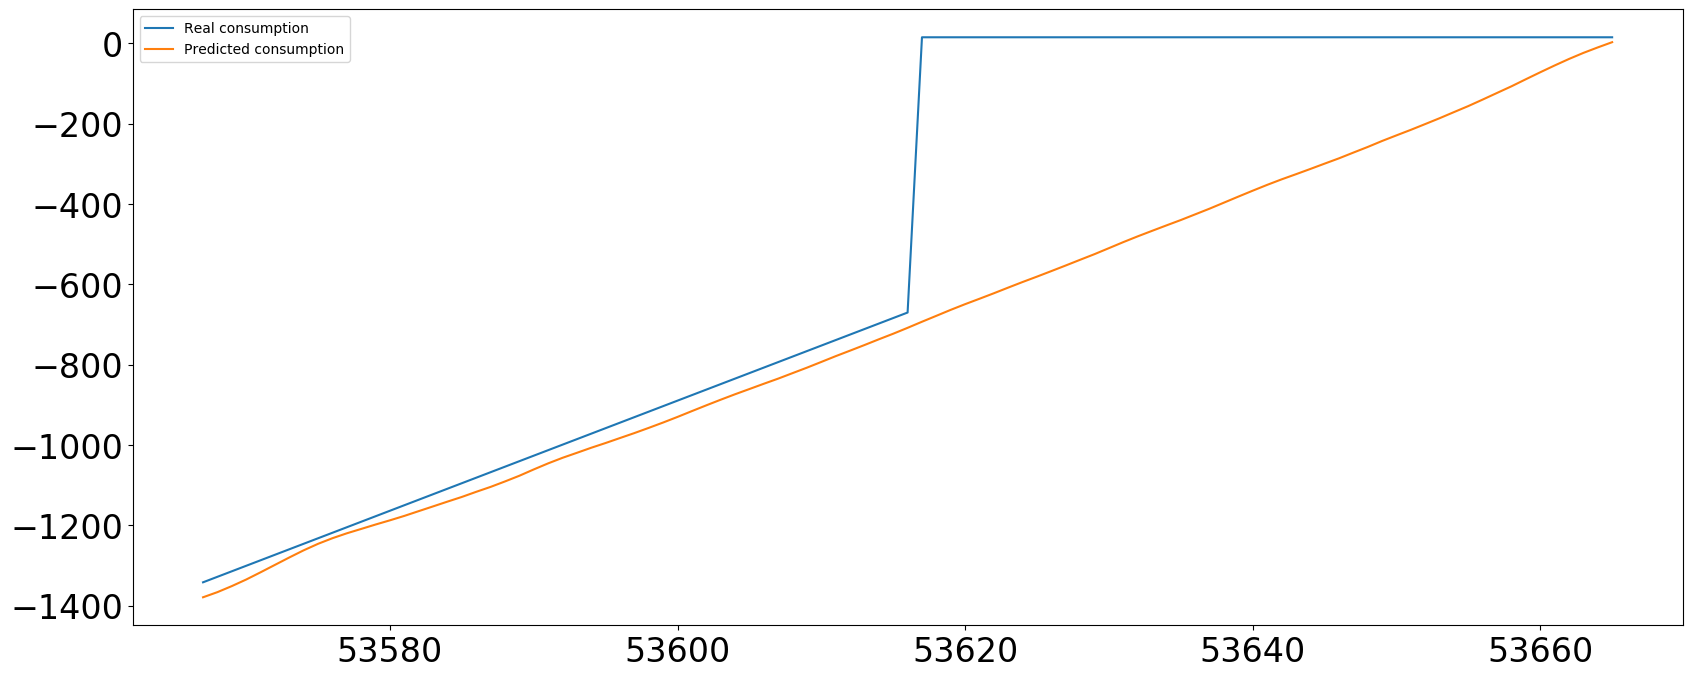

In [89]:
figure(figsize=(20,8))
plt.plot(y_real, label='Real consumption')
plt.plot(y_predict, label='Predicted consumption')
plt.legend()
plt.plot()

[]

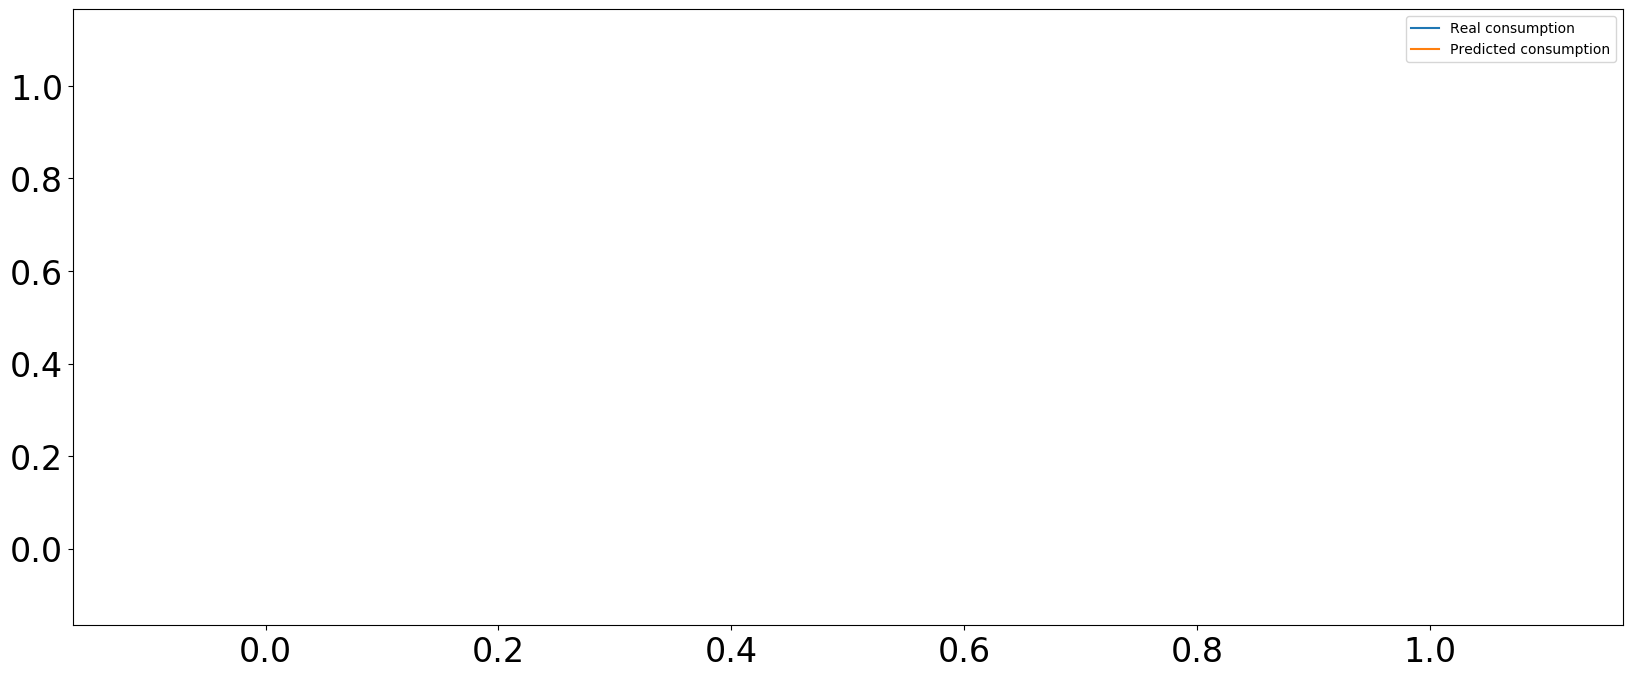

In [90]:
figure(figsize=(20,8))
plt.plot(y_real[:5000], label='Real consumption')
plt.plot(y_predict[:5000], label='Predicted consumption')
plt.legend()
plt.plot()

In [91]:
from nilmtk.losses import nde, mae, f1score
print(f"""
- F1-score: {f1score(y_real, y_predict)}
- NDE: {nde(y_real, y_predict)}
- MAE: {mae(y_real, y_predict)}
""")

C:\Users\david\.conda\envs\case-study\lib\site-packages\nilmtk\losses.py:32: RuntimeWarning: invalid value encountered in subtract
  numerator = np.sum((app_gt-app_pred)**2)
C:\Users\david\.conda\envs\case-study\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  


ValueError: Input contains infinity or a value too large for dtype('float64').